In [1]:
import torch
from torch import nn
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tslearn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

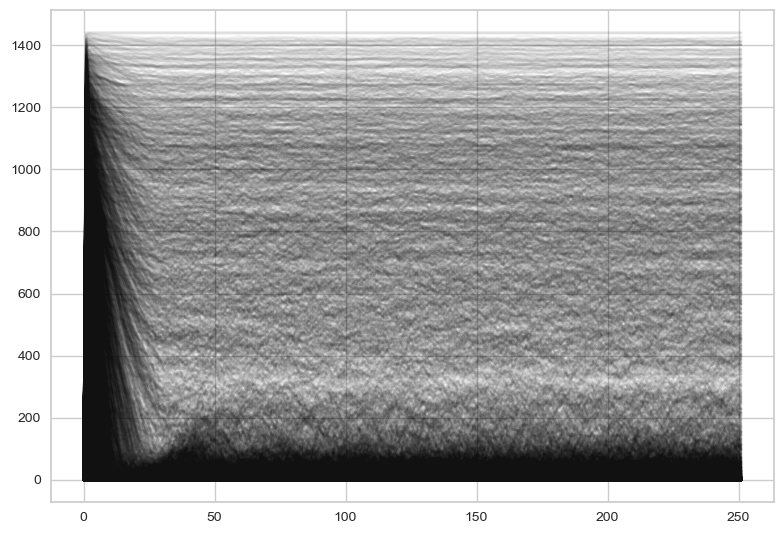

In [2]:
data_output = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_active.csv", header=None)

#scaler = MinMaxScaler()
#data_output_scaled = scaler.fit_transform(data_output)
#data_output = pd.DataFrame(data_output_scaled)

# --- Load the conditioning input parameters ---
data_input = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_inputs.csv", sep=" ", header=None)

# --- Combine input + output ---
data = pd.concat([data_input, data_output], axis=1)

# --- Sample to 1280 examples if needed ---
data = data.sample(n=10000, random_state=1)

# --- Split into training and validation sets ---
train_data_pd, valid_data = train_test_split(data, test_size=0.2, random_state=42)

df = to_time_series_dataset(train_data_pd.iloc[:, 3:].values)
plt.figure()
for ts in df:
    plt.plot(ts.ravel(), "k-", alpha=.05)
plt.tight_layout()
plt.show()

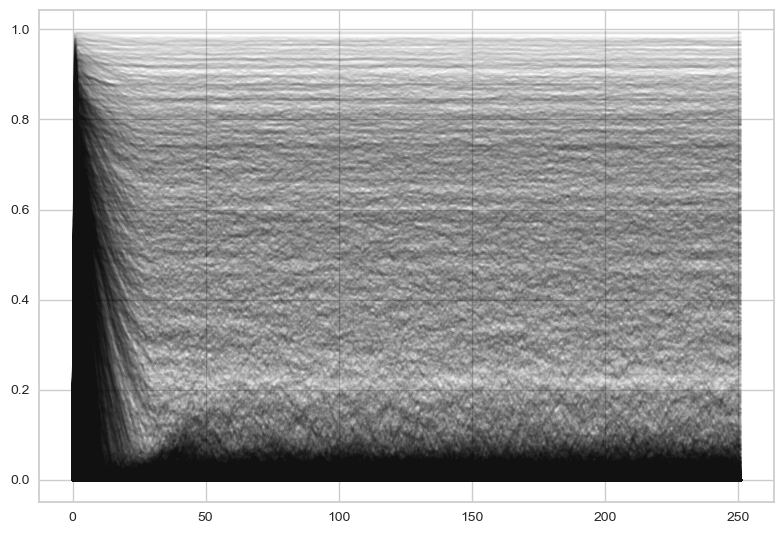

In [3]:
data_output = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_active.csv", header=None)

scaler = MinMaxScaler()
data_output_scaled = scaler.fit_transform(data_output)
data_output = pd.DataFrame(data_output_scaled)

# --- Load the conditioning input parameters ---
data_input = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_inputs.csv", sep=" ", header=None)

# --- Combine input + output ---
data = pd.concat([data_input, data_output], axis=1)

# --- Sample to 1280 examples if needed ---
data = data.sample(n=10000, random_state=1)

# --- Split into training and validation sets ---
train_data_pd, valid_data = train_test_split(data, test_size=0.2, random_state=42)

df = to_time_series_dataset(train_data_pd.iloc[:, 3:].values)
plt.figure()
for ts in df:
    plt.plot(ts.ravel(), "k-", alpha=.05)
plt.tight_layout()
plt.show()

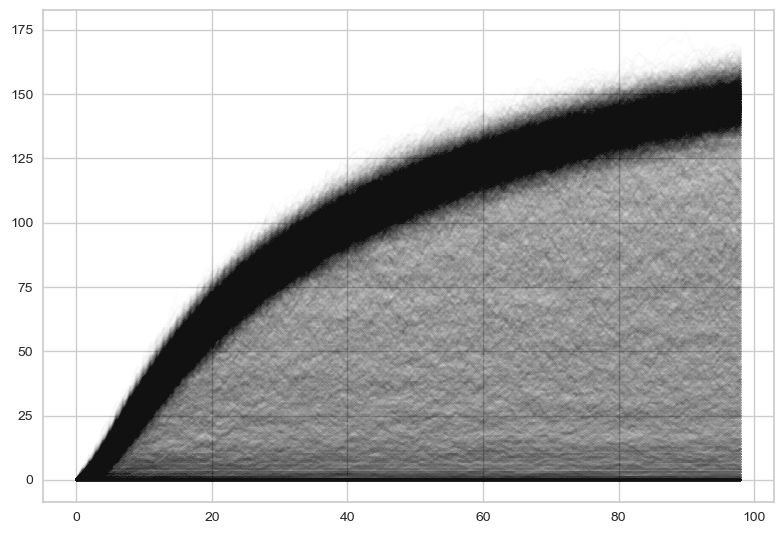

In [4]:
data_output = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_poor.csv", header=None)

#scaler = MinMaxScaler()
#data_output_scaled = scaler.fit_transform(data_output)
#data_output = pd.DataFrame(data_output_scaled)

# --- Load the conditioning input parameters ---
data_input = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_inputs.csv", sep=" ", header=None)

# --- Combine input + output ---
data = pd.concat([data_input, data_output], axis=1)

# --- Sample to 1280 examples if needed ---
data = data.sample(n=10000, random_state=1)

# --- Split into training and validation sets ---
train_data_pd, valid_data = train_test_split(data, test_size=0.2, random_state=42)

df = to_time_series_dataset(train_data_pd.iloc[:, 3:].values)
plt.figure()
for ts in df:
    plt.plot(ts.ravel(), "k-", alpha=.01)
plt.tight_layout()
plt.show()

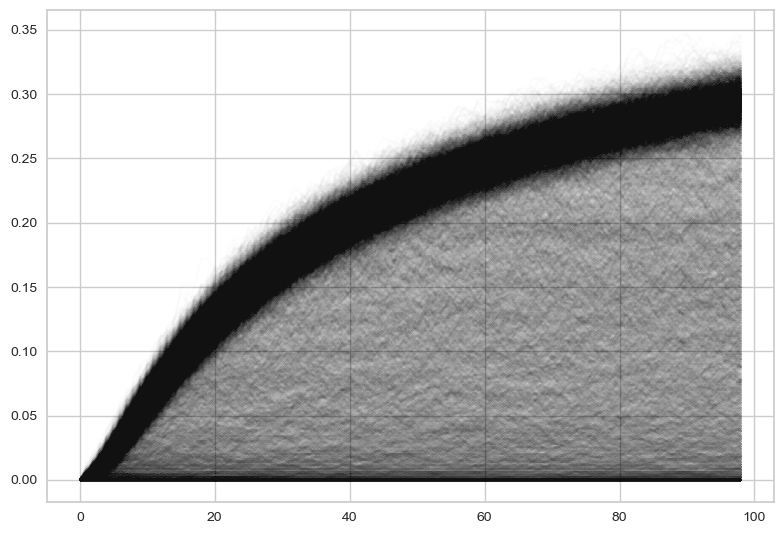

In [12]:
data_output = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_poor.csv", header=None)
data_output_helper = data_output
new_row = [500] * data_output_helper.shape[1]
data_output_helper.loc[len(data_output_helper)] = new_row
scaler = MinMaxScaler()
scaler.fit(data_output_helper)
data_output_scaled = scaler.transform(data_output)
data_output = pd.DataFrame(data_output_scaled)

# --- Load the conditioning input parameters ---
data_input = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_inputs.csv", sep=" ", header=None)

# --- Combine input + output ---
data = pd.concat([data_input, data_output], axis=1)

# --- Sample to 1280 examples if needed ---
data = data.sample(n=10000, random_state=1)

# --- Split into training and validation sets ---
train_data_pd, valid_data = train_test_split(data, test_size=0.2, random_state=42)

df = to_time_series_dataset(train_data_pd.iloc[:, 3:].values)
plt.figure()
for ts in df:
    plt.plot(ts.ravel(), "k-", alpha=.01)
plt.tight_layout()
plt.show()